# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "dallas"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather = requests.get(query_url)
print(weather)
weather = weather.json()
type(weather)
weather.keys()
print(weather)

<Response [200]>
{'coord': {'lon': -96.7836, 'lat': 32.7668}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 69.93, 'feels_like': 70.57, 'temp_min': 68.38, 'temp_max': 71.69, 'pressure': 1015, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1668100430, 'sys': {'type': 2, 'id': 2033373, 'country': 'US', 'sunrise': 1668084772, 'sunset': 1668122962}, 'timezone': -21600, 'id': 4684904, 'name': 'Dallas', 'cod': 200}


In [4]:
lat = weather["coord"]["lat"]
lng = weather["coord"]["lon"]
country = weather["sys"]["country"]
cloud = weather["clouds"]["all"]
date = weather["dt"]
name = weather["name"]
wind = weather["wind"]["speed"]
temp = weather["main"]['temp']
pressure = weather["main"]['pressure']
humidity = weather["main"]['humidity']

In [17]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities[0:500]:
        
  
    #print(city)
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather1 = requests.get(query_url)
#     print(weather1.status_code)
#     print()
    
    try:

        weather = weather1.json()

    
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        country = weather["sys"]["country"]
        cloud = weather["clouds"]["all"]
        date = weather["dt"]
        name = weather["name"]
        wind = weather["wind"]["speed"]
        temp = weather["main"]['temp']
        pressure = weather["main"]['pressure']
        humidity = weather["main"]['humidity']

      
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloud)
        dates.append(date)
        names.append(name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
    except Exception as e:
        print(e)
        
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        
    time.sleep(1)

'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
df = pd.DataFrame()
df["City"] = names
df["Country"] = countries
df["Latitude"] = lats
df["Longitude"] = lngs
df["Date"] = dates
df["Wind_Speed"] = winds
df["Pressure"] = pressures
df["Humidity"] = humids
df["Temperature"] = temps
df["Cloudiness"] = clouds
df.head(190)

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Cabedelo,BR,-6.9811,-34.8339,1.668101e+09,10.78,1011.0,67.0,86.67,70.0
1,Mataura,NZ,-46.1927,168.8643,1.668101e+09,2.55,1022.0,93.0,46.58,1.0
2,phan rang,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nizhneyansk,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pontianak,ID,-0.0333,109.3333,1.668101e+09,1.14,1010.0,100.0,76.98,75.0
...,...,...,...,...,...,...,...,...,...,...
95,Ngemplak,ID,-7.5497,110.7164,1.668102e+09,2.95,1010.0,90.0,75.54,99.0
96,Saskylakh,RU,71.9167,114.0833,1.668102e+09,4.74,1008.0,100.0,-26.37,53.0
97,Port Elizabeth,ZA,-33.9180,25.5701,1.668102e+09,10.36,1019.0,76.0,63.10,100.0
98,Genhe,CN,50.7833,121.5167,1.668102e+09,1.99,1022.0,96.0,20.89,100.0


In [23]:
df.to_csv("weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
df.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
count,87.000000,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000
mean,11.731432,18.510082,1.668101e+09,8.910575,1013.632184,71.942529,55.954023,52.114943
std,38.133164,101.692208,7.601986e+01,5.276943,7.694932,21.866060,26.949574,40.804818
min,-54.800000,-179.166700,1.668101e+09,0.810000,990.000000,9.000000,-26.370000,0.000000
25%,-22.012600,-71.666700,1.668101e+09,4.605000,1009.000000,60.000000,46.265000,7.000000
50%,12.600000,24.883300,1.668102e+09,8.300000,1014.000000,76.000000,63.050000,56.000000
75%,42.315250,113.271500,1.668102e+09,12.810000,1018.000000,89.000000,75.755000,99.000000
max,73.506900,170.966700,1.668102e+09,23.000000,1031.000000,100.000000,97.200000,100.000000


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

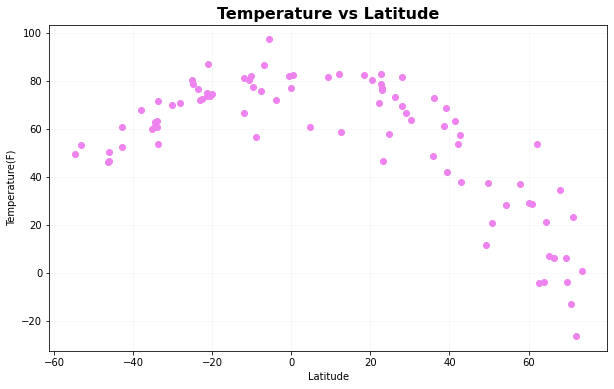

In [27]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color="violet")

plt.title("Temperature vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.grid(axis="both", alpha=0.1)


plt.savefig("tempvslat.png")
plt.show()

## Latitude vs. Humidity Plot

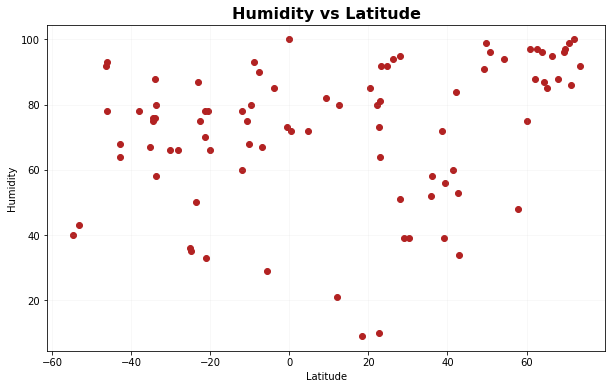

In [28]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color="firebrick")

plt.title("Humidity vs Latitude", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(axis="both", alpha=0.1)

plt.savefig("latvshumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

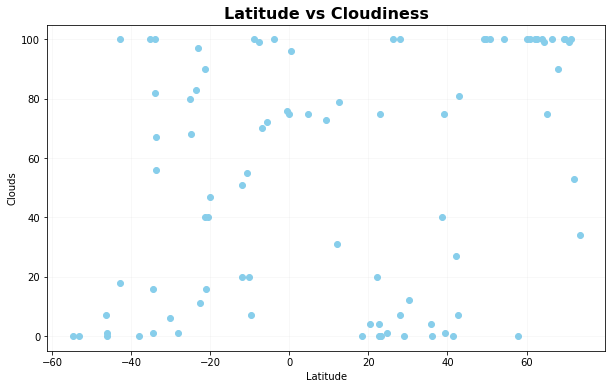

In [32]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color="skyblue")

plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Clouds")

plt.grid(axis="both", alpha=0.1)

plt.savefig("latvsclouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

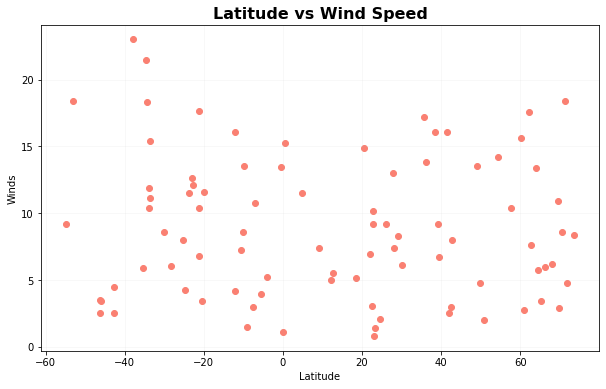

In [36]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Wind_Speed, color="salmon")

plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.xlabel("Latitude")
plt.ylabel("Winds")

plt.grid(axis="both", alpha=0.1)

plt.savefig("latvswind.png")
plt.show()

## Linear Regression

In [41]:
norther = df.loc[df.Latitude >= 0]
souther = df.loc[df.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7545828622831939


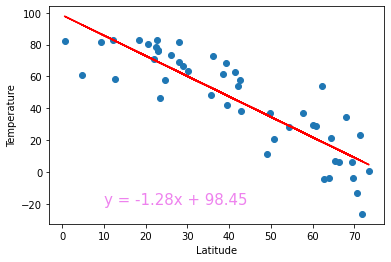

In [42]:
x_values = norther['Latitude']
y_values = norther['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,-20),fontsize=15,color="violet")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6112660956410667


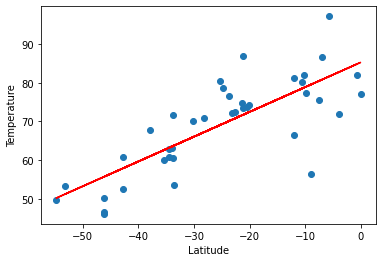

In [43]:
x_values = souther['Latitude']
y_values = souther['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,-20),fontsize=15,color="violet")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21315713128817745


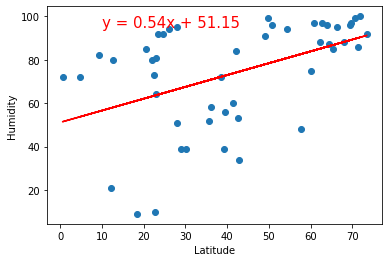

In [46]:
x_values = norther['Latitude']
y_values = norther['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.019864633033618007


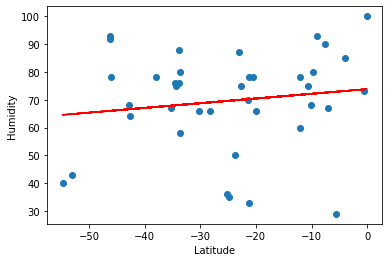

In [45]:
# Print out the r-squared value along with the plot.
x_values = souther['Latitude']
y_values = souther['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20316181483569318


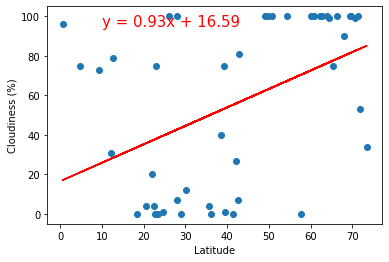

In [47]:
x_values = norther['Latitude']
y_values = norther['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1867662059963857


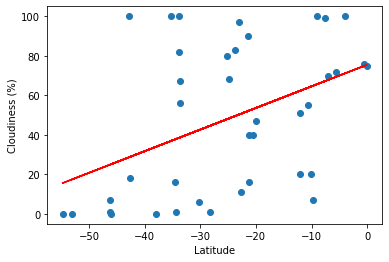

In [48]:
x_values = souther['Latitude']
y_values = souther['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002514662872913511


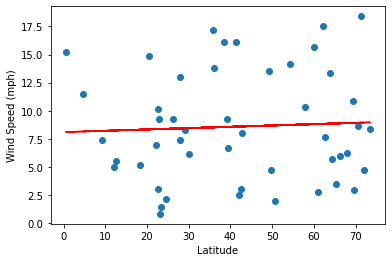

In [50]:
x_values = norther['Latitude']
y_values = norther['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02489949422965998


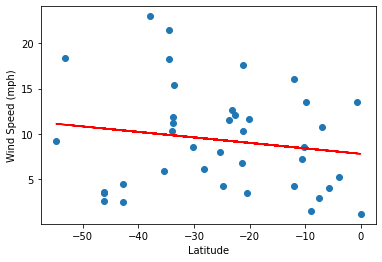

In [51]:
x_values = souther['Latitude']
y_values = souther['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {rvalue**2}")
plt.show()